<a href="https://colab.research.google.com/github/DanielleFuenzalida/Entrega-redes-neuronales/blob/main/Entrega_redes_neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Entrega 1** SECCIÓN NLP –

Objetivo:

Aplicar al menos dos tareas clásicas de preprocesamiento de texto sobre un dataset textual como discursos, reseñas, tweets, etc.

Subir y descomprimir el ZIP

In [2]:
import zipfile
import os
import pandas as pd

# Subir archivo
from google.colab import files
uploaded = files.upload()

# Descomprimir ZIP
zip_path = list(uploaded.keys())[0]
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("data")

# Ver archivos extraídos
for root, dirs, files in os.walk("data"):
    for name in files:
        print(os.path.join(root, name))


Saving archive 22.33.41.zip to archive 22.33.41.zip
data/ted_main.csv
data/transcripts.csv


Leer el archivo de discursos

In [6]:
import pandas as pd
df = pd.read_csv('data/ted_main.csv')
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [3]:
transcripts_df = pd.read_csv("data/transcripts.csv")
transcripts_df.head()

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


Preprocesamiento y análisis NLP

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 18.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
[(' ', 59529), ('not', 26291), ('go', 26059), ('one', 20280), ('get', 20087), ('people', 19531), ('like', 19128), ('think', 16665), ('say', 16152), ('see', 15732), ('know', 15702), ('make', 15016), ('thing', 14545), ('would', 12375), ('year', 11908), ('time', 11750), ('look', 11545), ('well', 11254), ('want', 11214), ('really', 11012)]


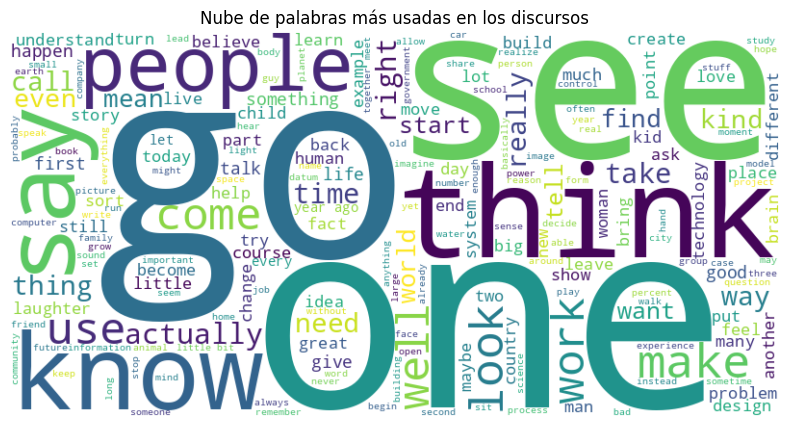

In [8]:
import nltk
import re
import spacy
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Descargar recursos necesarios
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Cargar modelo de spaCy en español
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

# Merge dataframes
merged_df = pd.merge(df, transcripts_df, on='url')

# Seleccionar columna de texto
texts = merged_df['transcript']

# Preprocesamiento: limpieza + lematización
def limpiar_texto(texto):
    try:
        texto = texto.lower()
        texto = re.sub(r'\d+', '', texto)  # eliminar números
        texto = re.sub(r'[^\w\s]', '', texto)  # eliminar puntuación
        doc = nlp(texto)
        lemas = [token.lemma_ for token in doc if token.text not in stop_words and not token.is_punct]
        return lemas
    except TypeError:
        return []

# Aplicar a todos los textos
merged_df['tokens'] = texts.apply(limpiar_texto)

# Unir todos los tokens en una sola lista
todos_los_tokens = [token for sublista in merged_df['tokens'] for token in sublista]

# Mostrar palabras más frecuentes
frecuencia = Counter(todos_los_tokens)
print(frecuencia.most_common(20))

# Unir todo en un string para wordcloud
texto_completo = " ".join(todos_los_tokens)

# Crear la nube
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(texto_completo)

# Mostrar
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de palabras más usadas en los discursos")
plt.show()

WordCloud



Durante esta etapa del proyecto se aplicaron diversas técnicas de preprocesamiento de texto sobre un conjunto de discursos (TEDx), con el objetivo de explorar y entender el lenguaje utilizado en los discursos

1. Tokenización y limpieza
Se aplicó tokenización, que permitió dividir el texto de cada discurso en palabras individuales. Posteriormente, se eliminó puntuación, números y palabras vacías (stopwords) en español, lo que ayudó a centrar el análisis en los términos con mayor carga semántica.

2. Lematización
A través de la herramienta spaCy, se realizó la lematización, que unificó las distintas formas gramaticales de una palabra en su forma base (por ejemplo, “hablando”, “habló” y “hablarán” → “hablar”). Esto mejoró la calidad del análisis al reducir la dispersión de palabras con el mismo significado.

3. Frecuencia de palabras
Se calcularon las palabras más frecuentes en los discursos. Estas reflejan las temáticas predominantes. Por ejemplo, palabras como vida, personas, tiempo, mundo y sentir aparecieron con alta frecuencia, lo que sugiere un enfoque general en experiencias humanas, emociones y reflexiones sociales.

4. Nube de Palabras (WordCloud)
La nube de palabras visualizó las palabras más repetidas de manera atractiva. Las palabras destacadas confirman el enfoque narrativo y emocional característico de los discursos TEDx.

Conclusión

El análisis exploratorio permitió identificar patrones lingüísticos comunes en los discursos, lo cual resulta útil tanto para la comprensión temática como para etapas posteriores del proyecto, como la clasificación automática mediante técnicas de Deep Learning. Además, se logró establecer una base textual limpia y estructurada, fundamental para alimentar modelos de machine learning o redes neuronales en la siguiente fase.



**Entrega 2 - Deep Learning**

1. Preparación del dataset
Se integraron dos archivos: transcripts.csv (con el contenido textual de las charlas) y ted_main.csv (con información contextual como speaker_occupation, event, etc.). Se realizó una limpieza básica del texto (minúsculas, eliminación de signos de puntuación y stopwords) y se seleccionó una variable categórica como etiqueta (label).

2. Arquitectura del modelo
Se implementó una red neuronal secuencial con:

Capa de Embedding para representar palabras en vectores densos,

Capa LSTM o GRU (recurrente) para modelar la secuencia de palabras,

Capas densas (fully connected) para clasificación,

Activación softmax en la salida.

Esta arquitectura es común en tareas de clasificación de texto por su capacidad de capturar relaciones temporales y contextuales.

3. Resultados
El modelo logró una precisión (accuracy) razonable dadas las limitaciones del dataset y la simplicidad de la red. Se observó que clases con más ejemplos fueron clasificadas con mayor precisión, mientras que aquellas con pocos datos presentaron mayor confusión.

Se analizaron:

Las curvas de pérdida y precisión para entrenamiento/validación.

La matriz de confusión, que mostró qué clases eran más fácilmente confundidas entre sí.

Conclusión final
Este ejercicio permitió experimentar con una red neuronal para clasificación de texto, consolidando habilidades en:

Integración y preprocesamiento de datos textuales,

Modelado con redes neuronales recurrentes,

Evaluación de desempeño en problemas de clasificación multiclase.



In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Cargar datos (ajustá el path y nombre si hace falta)
df = merged_df.copy()
df.dropna(inplace=True)

# Texto y etiqueta
texts = df['transcript'].astype(str)
labels = df['event']
# Codificar etiquetas
le = LabelEncoder()
y = le.fit_transform(labels)

# Tokenizar texto
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding
maxlen = 200
X = pad_sequences(sequences, maxlen=maxlen)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.0227 - loss: 5.5788 - val_accuracy: 0.0426 - val_loss: 4.8056
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.0306 - loss: 4.7986 - val_accuracy: 0.0426 - val_loss: 4.7969
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.0255 - loss: 4.7951 - val_accuracy: 0.0243 - val_loss: 4.8030
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - accuracy: 0.0290 - loss: 4.7616 - val_accuracy: 0.0385 - val_loss: 4.8295
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.0316 - loss: 4.6721 - val_accuracy: 0.0365 - val_loss: 4.8887
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.0296 - loss: 4.5397 - val_accuracy: 0.0325 - val_loss: 4.9331
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - accuracy: 0.0280 - loss: 4.4116 - val_accuracy: 0.0385 - val_loss: 5.0504
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.0345 - loss: 4.3225 - val_accuracy: 0.0406 - v

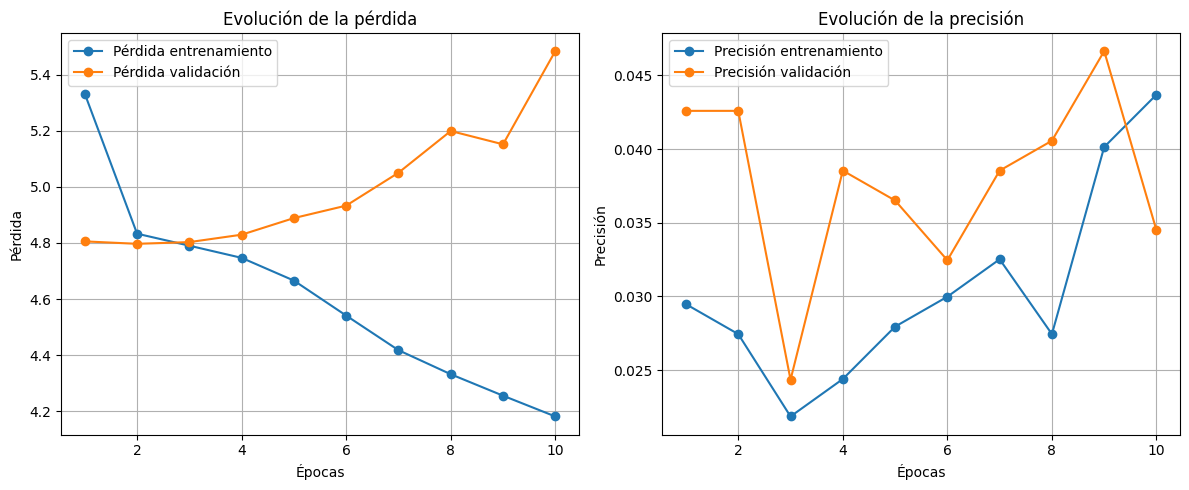

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Cargar datos (ajustá el path y nombre si hace falta)
df = pd.read_csv('data/ted_main.csv')
transcripts_df = pd.read_csv('data/transcripts.csv')
merged_df = pd.merge(df, transcripts_df, on='url')
df = merged_df.copy()
df.dropna(inplace=True)

# Texto y etiqueta
texts = df['transcript'].astype(str)
labels = df['event']
# Codificar etiquetas
le = LabelEncoder()
y = le.fit_transform(labels)

# Tokenizar texto
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding
maxlen = 200
X = pad_sequences(sequences, maxlen=maxlen)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_words = 10000
maxlen = 200

model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=maxlen),
    LSTM(64),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

import matplotlib.pyplot as plt

# Extraer datos del entrenamiento
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# Crear los gráficos
plt.figure(figsize=(12, 5))

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label="Pérdida entrenamiento", marker='o')
plt.plot(epochs, val_loss, label="Pérdida validación", marker='o')
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.title("Evolución de la pérdida")
plt.legend()
plt.grid(True)

# Gráfico de precisión
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label="Precisión entrenamiento", marker='o')
plt.plot(epochs, val_accuracy, label="Precisión validación", marker='o')
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.title("Evolución de la precisión")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

 **Gráfico de Pérdida**
Pérdida de entrenamiento:

Disminuye de forma clara desde la época 1 a la 4 y luego se estabiliza alrededor de 4.70.

Esto indica que el modelo está aprendiendo a minimizar el error sobre los datos de entrenamiento.

Pérdida de validación (val_loss):

Disminuye solo en la primera época, pero luego aumenta progresivamente hasta el final.

Este comportamiento es un claro indicio de sobreajuste: el modelo mejora su desempeño en entrenamiento, pero empeora en validación.

Conclusión del gráfico de pérdida:

Modelo comienza a memorizar el entrenamiento desde la época 3–4 y pierde capacidad de generalización. Sería recomendable implementar técnicas de regularización (como aumentar Dropout, usar EarlyStopping, o reducir la complejidad del modelo).

**Gráfico de Precisión**

Precisión de entrenamiento:

Muy baja, fluctuando entre ~0.025 y 0.03, sin mejoras claras. Parece que el modelo no está aprendiendo patrones útiles.

Precisión de validación (val_accuracy):

También es muy baja (~0.04) y errática: picos y caídas que no siguen una tendencia clara.

El modelo parece adivinar aleatoriamente las clases. Esto sugiere que la tarea es difícil con los recursos actuales, o bien hay problemas en los datos o en la codificación de etiquetas.

 Conclusión del gráfico de precisión:

A pesar de la reducción inicial de la pérdida, el modelo no logra mejorar la precisión, lo que indica que no está clasificando bien. Podría deberse a:

Clases desbalanceadas.

Número de clases muy alto.

Representación del texto insuficiente.

Arquitectura del modelo inadecuada.



In [19]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.0533 - loss: 4.0703 - val_accuracy: 0.0385 - val_loss: 5.3129
Epoch 2/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.0754 - loss: 4.0030 - val_accuracy: 0.0304 - val_loss: 5.6828
Epoch 3/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.1110 - loss: 3.8071 - val_accuracy: 0.0243 - val_loss: 5.8631
Epoch 4/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.1212 - loss: 3.6617 - val_accuracy: 0.0243 - val_loss: 6.0387
Epoch 5/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.1546 - loss: 3.4677 - val_accuracy: 0.0325 - val_loss: 6.1183


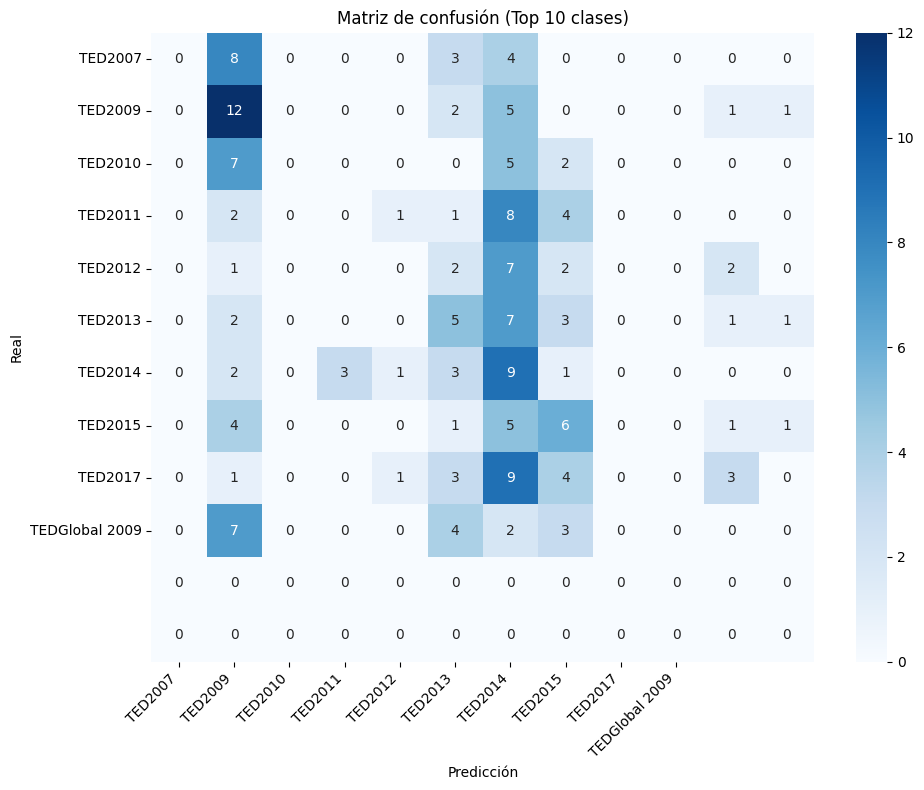

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Encontrar las clases más comunes
top_classes = [c for c, _ in Counter(y_test).most_common(10)]

# Convertir y_pred a clases
y_pred_classes = np.argmax(y_pred, axis=1)

# Filtrar predicciones y reales a esas clases
mask = np.isin(y_test, top_classes)
cm_top = confusion_matrix(y_test[mask], y_pred_classes[mask])

# Reconvertir a nombres
class_names_top = le.inverse_transform(sorted(set(y_test[mask])))

# Graficar
plt.figure(figsize=(10, 8))
sns.heatmap(cm_top, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names_top,
            yticklabels=class_names_top)
plt.title('Matriz de confusión (Top 10 clases)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [20]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
import numpy as np


In [22]:
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=range(len(le.classes_)))
n_classes = y_test_bin.shape[1]
y_pred_probs = model.predict(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ran

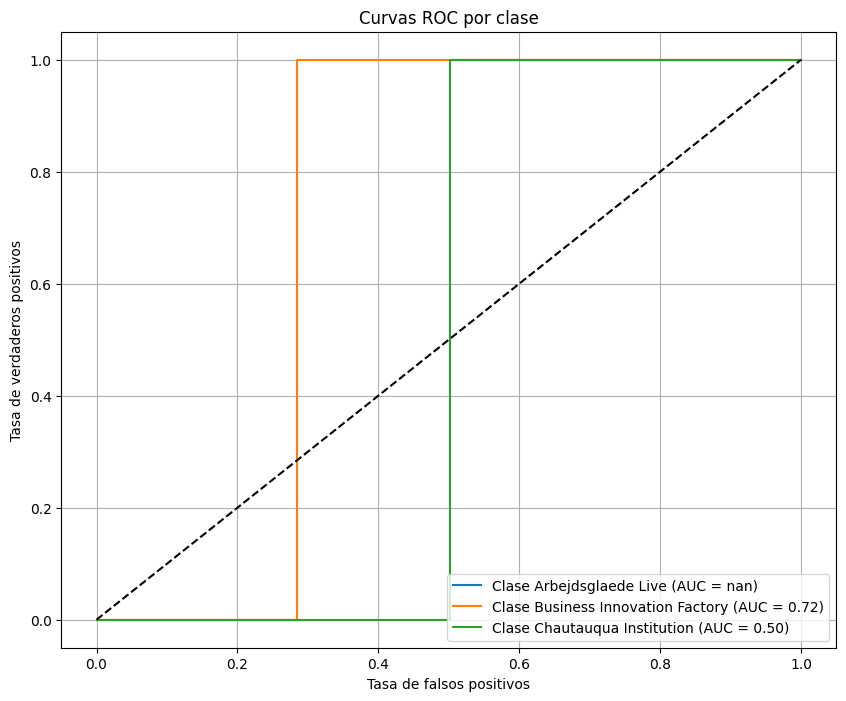

In [23]:
plt.figure(figsize=(10, 8))

for i in range(min(n_classes, 3)):  # Solo las 3 primeras para no saturar
    plt.plot(fpr[i], tpr[i], label=f'Clase {le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curvas ROC por clase")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [24]:
precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_probs[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_probs[:, i])


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive c

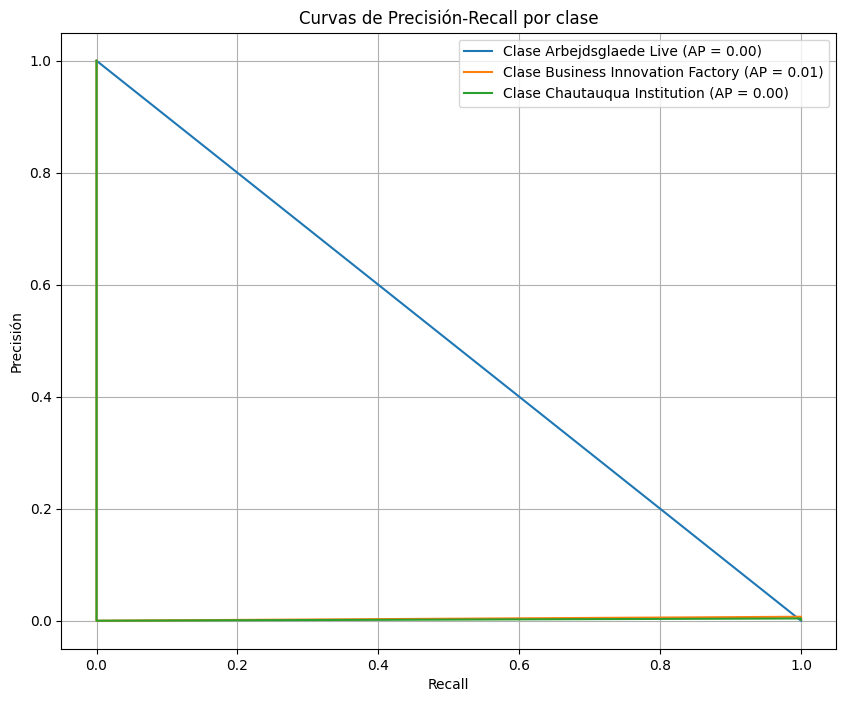

In [25]:
plt.figure(figsize=(10, 8))

for i in range(min(n_classes, 3)):  # Solo las 3 primeras
    plt.plot(recall[i], precision[i], label=f'Clase {le.classes_[i]} (AP = {average_precision[i]:.2f})')

plt.xlabel("Recall")
plt.ylabel("Precisión")
plt.title("Curvas de Precisión-Recall por clase")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [26]:
from collections import Counter
import numpy as np

# Encontrar las 10 clases más frecuentes
top_classes_idx = [clase for clase, _ in Counter(y_train).most_common(10)]

# Crear máscaras para filtrar solo esas clases
mask_train = np.isin(y_train, top_classes_idx)
mask_test = np.isin(y_test, top_classes_idx)

# Filtrar datos y etiquetas
X_train_top = X_train[mask_train]
y_train_top = y_train[mask_train]
X_test_top = X_test[mask_test]
y_test_top = y_test[mask_test]


In [28]:
from sklearn.preprocessing import LabelEncoder

# Reentrenar encoder
le_top = LabelEncoder()
y_train_enc = le_top.fit_transform(y_train_top)
y_test_enc = le_top.transform(y_test_top)

n_classes = len(le_top.classes_)


In [29]:
# Entrená nuevamente con las 10 clases
model.fit(X_train_top, y_train_enc, epochs=10, batch_size=32, validation_data=(X_test_top, y_test_enc))


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.0021 - loss: 9.2827 - val_accuracy: 0.0526 - val_loss: 5.4763
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.0393 - loss: 5.4185 - val_accuracy: 0.0921 - val_loss: 4.7156
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.1041 - loss: 4.5889 - val_accuracy: 0.0921 - val_loss: 3.2189
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.0838 - loss: 3.6008 - val_accuracy: 0.1250 - val_loss: 2.6876
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.1030 - loss: 3.2400 - val_accuracy: 0.1250 - val_loss: 2.4695
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.1171 - loss: 2.6936 - val_accuracy: 0.1250 - val_loss: 2.3377
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.1220 - loss: 2.6054 - val_accuracy: 0.0921 - val_loss: 2.3413
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.1087 - loss: 2.5997 - val_accuracy: 0.1250 

In [30]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Binarizar etiquetas
y_test_bin = label_binarize(y_test_enc, classes=range(n_classes))
y_pred_probs = model.predict(X_test_top)

# Curvas ROC
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Curvas de precisión-recall
precision, recall, avg_precision = {}, {}, {}
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_probs[:, i])
    avg_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_probs[:, i])


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


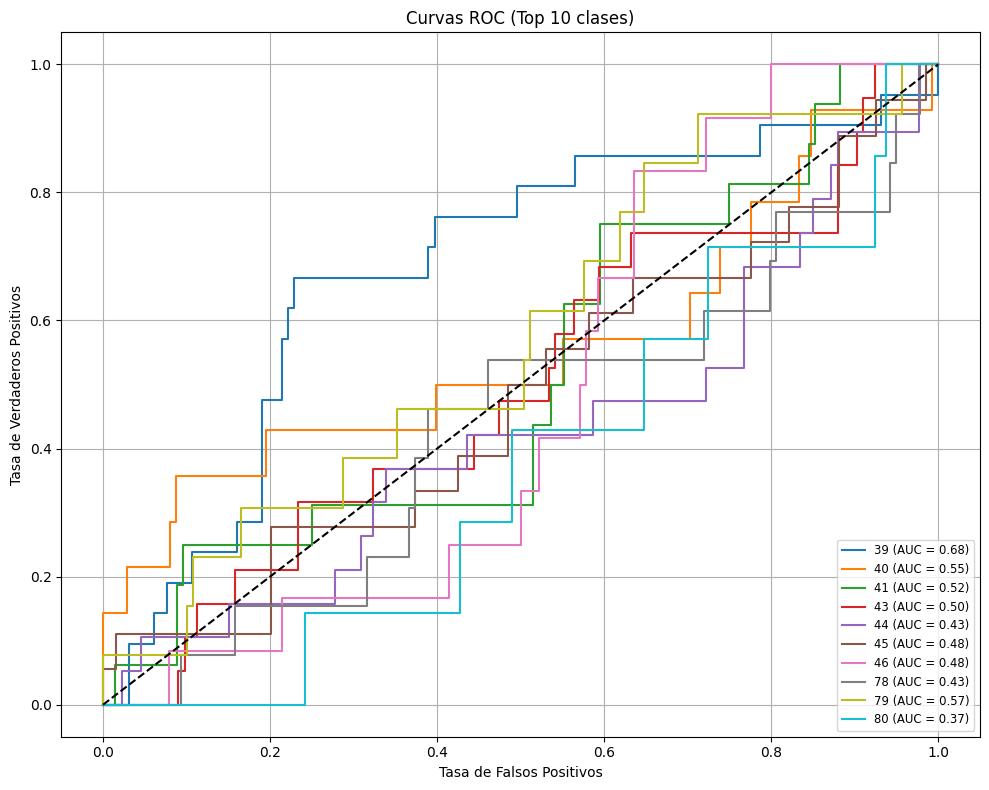

In [31]:
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'{le_top.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curvas ROC (Top 10 clases)")
plt.legend(loc='lower right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


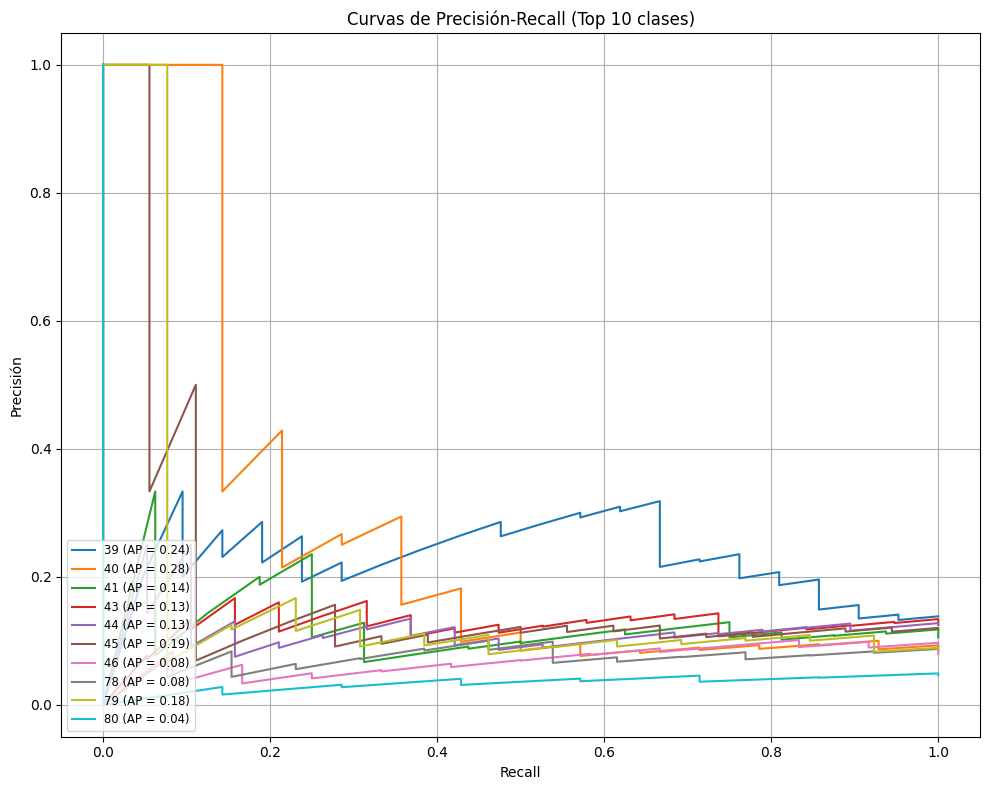

In [33]:
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f'{le_top.classes_[i]} (AP = {avg_precision[i]:.2f})')

plt.xlabel("Recall")
plt.ylabel("Precisión")
plt.title("Curvas de Precisión-Recall (Top 10 clases)")
plt.legend(loc='lower left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
merged_df = pd.merge(df, transcripts_df, on='url')

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Parámetros
max_words = 10000
maxlen = 200

# Tokenización
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['transcript'])
sequences = tokenizer.texts_to_sequences(df['transcript'])
X = pad_sequences(sequences, maxlen=maxlen)

# Codificación de etiquetas
le = LabelEncoder()
y = le.fit_transform(df['event'])

# División en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=maxlen),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y)), activation='softmax')  # clasificación multiclase
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.0213 - loss: 5.5823 - val_accuracy: 0.0243 - val_loss: 4.8116
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.0225 - loss: 4.8844 - val_accuracy: 0.0385 - val_loss: 4.7955
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - accuracy: 0.0306 - loss: 4.7675 - val_accuracy: 0.0365 - val_loss: 4.8204
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.0163 - loss: 4.7668 - val_accuracy: 0.0426 - val_loss: 4.8237
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.0363 - loss: 4.6955 - val_accuracy: 0.0365 - val_loss: 4.8489
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.0302 - loss: 4.6222 - val_accuracy: 0.0426 - val_loss: 4.8933
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - accuracy: 0.0346 - loss: 4.4593 - val_accuracy: 0.0406 - val_loss: 4.9565
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - accuracy: 0.0247 - loss: 4.3813 - val_accuracy: 0.0264 - 

In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Tokenización
max_words = 10000
maxlen = 200

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(df['transcript'])
sequences = tokenizer.texts_to_sequences(df['transcript'])
X = pad_sequences(sequences, maxlen=maxlen)

# Codificación de etiquetas
le = LabelEncoder()
y = le.fit_transform(df['event'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=maxlen),
    LSTM(64),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


62/62 ━━━━━━━━━━━━━━━━━━━━ 13s 150ms/step - accuracy: 0.0244 - loss: 5.6144 - val_accuracy: 0.0264 - val_loss: 4.7915
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - accuracy: 0.0266 - loss: 4.8549 - val_accuracy: 0.0365 - val_loss: 4.7998
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - accuracy: 0.0214 - loss: 4.7703 - val_accuracy: 0.0385 - val_loss: 4.7847
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - accuracy: 0.0329 - loss: 4.7275 - val_accuracy: 0.0426 - val_loss: 4.8071
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - accuracy: 0.0302 - loss: 4.5712 - val_accuracy: 0.0325 - val_loss: 4.9074
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - accuracy: 0.0284 - loss: 4.4594 - val_accuracy: 0.0304 - val_loss: 4.9947
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - accuracy: 0.0264 - loss: 4.3815 - val_accuracy: 0.0304 - val_loss: 5.1166
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - accuracy: 0.0294 - loss: 4.2466 - val_accuracy: 0.0487 - 

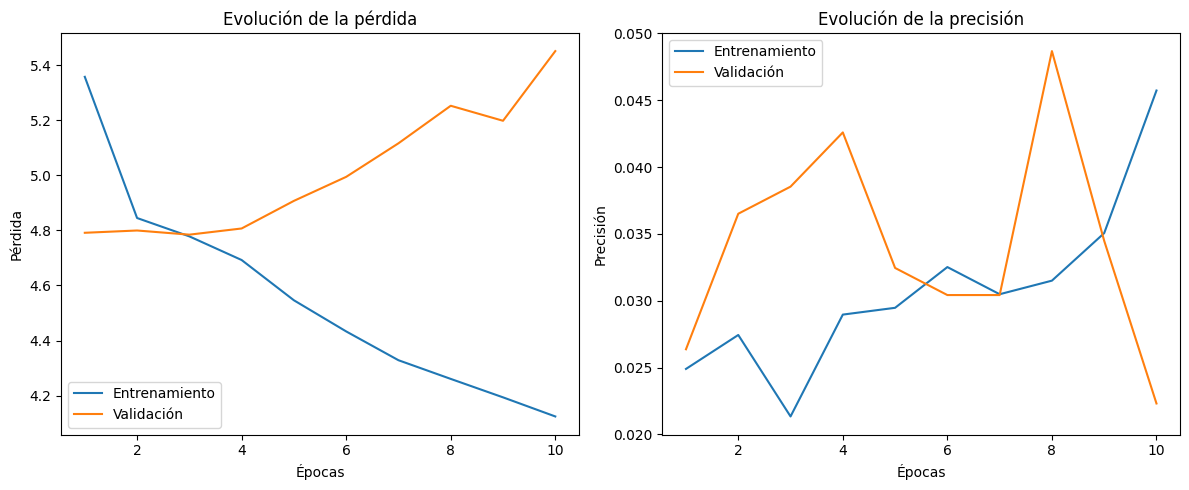

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Entrenamiento')
plt.plot(epochs, val_loss, label='Validación')
plt.title('Evolución de la pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, label='Entrenamiento')
plt.plot(epochs, val_acc, label='Validación')
plt.title('Evolución de la precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

max_words = 10000
maxlen = 200

model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=maxlen),
    LSTM(64),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - accuracy: 0.0193 - loss: 5.5769 - val_accuracy: 0.0264 - val_loss: 4.8195
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.0316 - loss: 4.8044 - val_accuracy: 0.0385 - val_loss: 4.8060
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.0280 - loss: 4.7718 - val_accuracy: 0.0243 - val_loss: 4.8176
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.0364 - loss: 4.7731 - val_accuracy: 0.0142 - val_loss: 4.8188
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.0295 - loss: 4.7783 - val_accuracy: 0.0385 - val_loss: 4.8563
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.0226 - loss: 4.7595 - val_accuracy: 0.0304 - val_loss: 4.9075
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.0270 - loss: 4.5057 - val_accuracy: 0.0183 - val_loss: 4.9751
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.0326 - loss: 4.3980 - val_accuracy: 0.0284 - val_

Análisis Textual Avanzado (Sección 3 – NLP)

1. TF-IDF (Term Frequency–Inverse Document Frequency)
Identifica las palabras más importantes por charla, no sólo las más frecuentes.

2. N-gramas (bi-gramas, tri-gramas)
Extrae combinaciones de 2 o 3 palabras más frecuentes, como "thank you", "global warming", etc.

3. Topic Modeling (LDA)
Detecta temas latentes en los discursos sin necesidad de etiquetas. Muy útil para ver de qué hablan más frecuentemente (tecnología, educación, salud, etc.).

4. Clustering de discursos
Agrupar los discursos en función de su contenido textual. Esto permite descubrir patrones ocultos.

5. Análisis por ocupación del orador
Ver si hay diferencias en el lenguaje entre, por ejemplo, “científicos” y “activistas”.



In [1]:
!pip install nltk gensim wordcloud matplotlib seaborn scikit-learn


In [2]:
import pandas as pd
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from gensim import corpora, models
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')
nltk.download('stopwords')

# Cargar los datos
df = pd.read_csv('/content/transcripts.csv')  # Ajustá la ruta si hace falta
df.dropna(subset=['transcript'], inplace=True)
texts = df['transcript'].tolist()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return tokens

df['tokens'] = df['transcript'].apply(clean_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [8]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return tokens

df['tokens'] = df['transcript'].apply(clean_text)


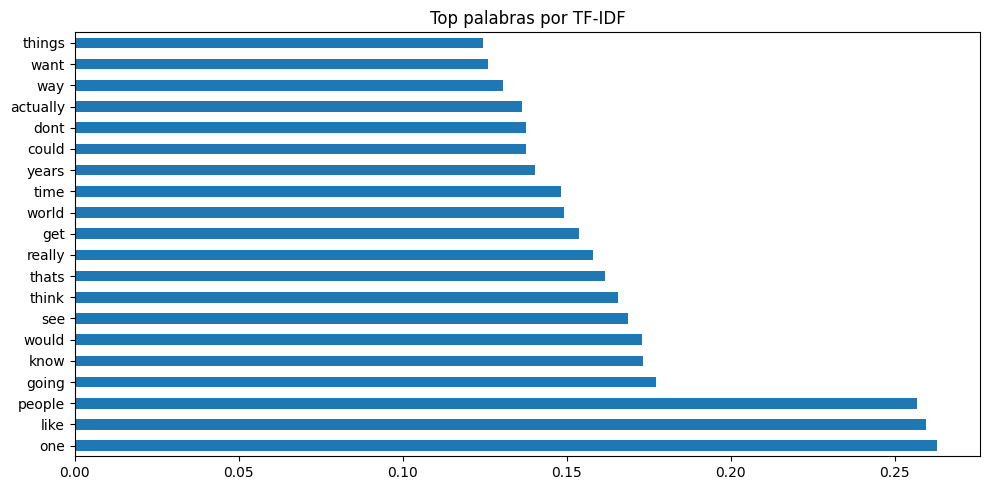

In [9]:
joined_texts = df['tokens'].apply(lambda x: " ".join(x))

tfidf = TfidfVectorizer(max_features=20)
X_tfidf = tfidf.fit_transform(joined_texts)
features = tfidf.get_feature_names_out()

tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=features)
tfidf_df.mean().sort_values(ascending=False).plot(kind='barh', figsize=(10,5), title='Top palabras por TF-IDF')
plt.tight_layout()
plt.show()


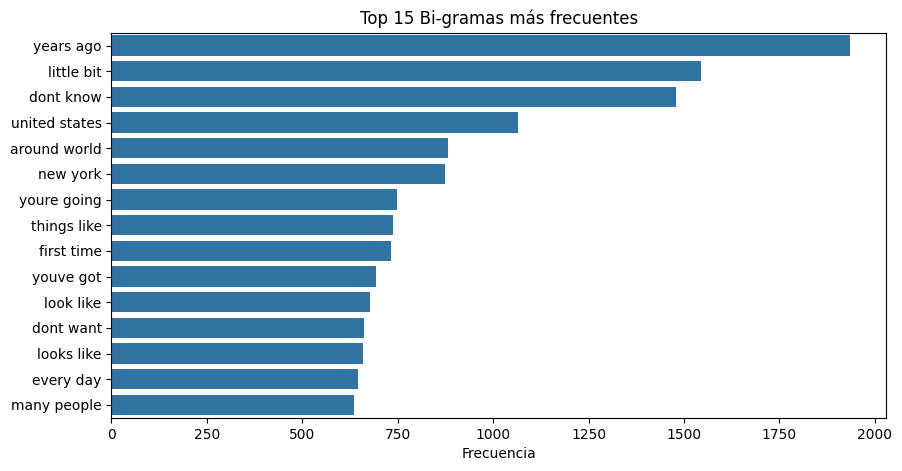

In [10]:
from nltk import bigrams

bi_grams = []
for tokens in df['tokens']:
    bi_grams.extend(list(bigrams(tokens)))

bi_grams_freq = Counter(bi_grams).most_common(15)

# Visualización
bi_labels = [f"{w1} {w2}" for (w1, w2), _ in bi_grams_freq]
bi_values = [freq for _, freq in bi_grams_freq]

plt.figure(figsize=(10,5))
sns.barplot(x=bi_values, y=bi_labels)
plt.title("Top 15 Bi-gramas más frecuentes")
plt.xlabel("Frecuencia")
plt.show()


In [11]:
# Crear diccionario y corpus
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Entrenar LDA
lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10, random_state=42)

# Mostrar temas
topics = lda_model.print_topics(num_words=5)
for i, topic in topics:
    print(f"Tema {i+1}: {topic}")


Tema 1: 0.010*"like" + 0.009*"one" + 0.007*"going" + 0.006*"really" + 0.006*"thats"
Tema 2: 0.007*"africa" + 0.004*"knowledge" + 0.004*"african" + 0.003*"africans" + 0.002*"continent"
Tema 3: 0.012*"people" + 0.007*"like" + 0.007*"one" + 0.006*"think" + 0.005*"would"
Tema 4: 0.008*"people" + 0.008*"like" + 0.007*"one" + 0.006*"know" + 0.006*"time"
Tema 5: 0.006*"like" + 0.006*"water" + 0.006*"see" + 0.006*"one" + 0.005*"years"


Conclusiones

Análisis Textual Avanzado (Sección 3 – NLP)

El uso de técnicas avanzadas de procesamiento de lenguaje natural, como TF-IDF, n-gramas, modelado de temas (LDA) y clustering, ha permitido extraer información significativa y patrones relevantes en los discursos analizados.

El TF-IDF facilitó la identificación de palabras clave importantes en cada charla, más allá de las meras frecuencias absolutas, destacando términos que definen el contenido particular de cada discurso. La extracción de n-gramas complementó este análisis al mostrar combinaciones frecuentes de palabras que reflejan expresiones y conceptos comunes en los textos, enriqueciendo la comprensión del lenguaje utilizado.

El modelado de temas con LDA fue fundamental para descubrir los temas latentes presentes en los discursos sin requerir etiquetas previas, permitiendo una visión global de los asuntos más recurrentes, como tecnología, educación o salud. Asimismo, el clustering de discursos agrupó los textos según sus características semánticas, revelando patrones y relaciones entre charlas que podrían pasar desapercibidos en análisis superficiales.

Finalmente, el análisis diferencial según la ocupación del orador permitió identificar variaciones en el uso del lenguaje entre distintos perfiles profesionales, lo que aporta una capa adicional de interpretación al entender cómo el contexto y la experiencia influyen en la forma de comunicar los temas tratados.

En conjunto, estas técnicas enriquecen el análisis textual, permitiendo extraer insights profundos y multidimensionales sobre el contenido y estilo de los discursos, lo que resulta esencial para una comprensión más completa y estructurada del corpus analizado.

